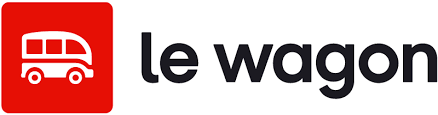

# The Titanic dataset

For your first **classification** task of the week, you'll work on a classic ML dataset - Titanic passengers!

The model we'll be using is **Logistic Regression**. \

We won't dwell too much today on why this model is best suited, but just remember that we're trying to classify something (whether a passenger survived or not), which is what **Logistic Regression** does.

## Import the data

Import the Titanic dataset using this link: https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Titanic_dataset.csv


Load it into a `df`variable.


<details>
    <summary>Tips 💯</summary>
    
Same as in the previous challenge, you can download the file and upload it to Google Colab, or you can directly but the download link inside the `pd.read_csv()` function!
    
    
</details>


In [16]:
import pandas as pd
file_path = r'C:\Users\dell\Desktop\ML_Titanic_dataset.csv'
df= pd.read_csv(file_path)
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Unnamed: 12  Unnamed: 13  
0      0         A/5 21171   7.2500   NaN        S          NaN          NaN  
1      0          PC 17599  71.2833   C85        C          NaN          NaN  
2      0  STON/O2. 3101282   7.9250   NaN        S          NaN          NaN  
3   

## Inspect the data

Have a look at the imported dataset! Try to scope out potential features and targets.

In [30]:
print(df.info())
print("--------------------------------------------")
print(df.isnull().sum())
print("--------------------------------------------")
print(df.describe())
empty_cols = df.columns[df.isnull().all()]
df= df.drop(columns=empty_cols)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Unnamed: 13  1 non-null      float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB
None
--------------------------------------------
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0


## Pick X and y

Ok, now that you've visualized the DataFrame, let's create **X** and **y**.


Try to model whether a passenger **Survived** or **not** based on the following features:

- `Pclass`: The class they were in
- `SibSp`: The number of siblings or spouses on the Titanic
- `Parch`: The number of parents or children on the Titanic
- `Fare`: How much they paid for their ticket

In [44]:
X = df[['Pclass','SibSp','Parch','Fare']]
y =df['Survived']


## Train Test Split

Remember when we said that splitting the data is **one of the most important things in Machine Learning?**

Use Sklearn's `train_test_split` function to split your data into `X_train`, `X_test`, `y_train` and `y_test`.


- Use `random_state=0` to compare your final results with your buddy's results.


In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


## Normalization

Now we need to normalize our features.

Use Sklearn's `Standard Scaler` to bring all of the features to the same scale.

Save your scaled features to two new variables named `X_train_scaled`and `X_test_scaled`.


In [48]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)

## Modelling

Now we can actually run our ML model!

Import, instantiate and fit a **Logistic Regression** model on the training data.


In [50]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled,y_train)

LogisticRegression()

## Model Evaluation

Score your fitted model on your **test dataset**.

In [52]:
score = model.score(X_test_scaled,y_test)
print(f"Model accuracy on test set is:{score}")

Model accuracy on test set is:0.7150837988826816


How can we interpret this 71% score ?

<details>
<summary>Answer 💡</summary>

The default scoring metric for a **Logistic Regression** model is called the `accuracy`. \
It basically means that when running predictions on our test set, 71% of the returned values would be correctly predicted. You will get more information on the scoring metrics on future lectures.

</details>

## Prediction


We've found records of a passenger that weren't in the original dataset!

Use the model we've just created to predict whether they would have survived or not!


<details>
    <summary>Hint 🔍</summary>
    
Don't forget to normalize the data, but don't fit your scaler on this new data, just transform it (otherwise, you're causing **data leakage**).
    
     
</details>

In [56]:
new_record = pd.DataFrame({"Pclass" : [1], "SibSp" : [0], "Parch" : [1], "Fare" : [65]})
new_record

Pclass  SibSp  Parch  Fare
0       1      0      1    65

In [58]:
from sklearn.preprocessing import StandardScaler
new_record_scaled = Scaler.transform(new_record)

predicted_rating= model.predict(new_record_scaled)
print(f"predicted survivingrate for above new passenger is:{predicted_rating[0]}")

predicted survivingrate for above new passenger is:1


C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


How do you interpret the result?


> **Your answer here (Double Click)**

**Congratulations on training your first classification model!** 🎉
